# **Algoritmos Genéticos para Traveling Salesman Problem (TSP)**

## **Objetivos**:



- **Compreender:** Os fundamentos teóricos dos algoritmos genéticos e sua aplicação no contexto do TSP.
- **Analisar:** As vantagens e desvantagens dos algoritmos genéticos em comparação com outras abordagens para o TSP.
- **Implementar:** Um algoritmo genético funcional em Python para encontrar soluções (sub)ótimas para o TSP.
- **Experimentar:** Com diferentes parâmetros do algoritmo genético para avaliar seu desempenho e robustez.
- **Discutir:** Os desafios e possíveis melhorias na implementação e aplicação de algoritmos genéticos para o TSP.

## **Pré-requisitos**: Conhecimento básico de Python.

## **Introdução ao Problema do Caixeiro Viajante (TSP)**

### **Definição formal do problema**

O Problema do Caixeiro Viajante (TSP, do inglês "Traveling Salesman Problem") é um dos desafios mais icônicos e estudados no campo da otimização combinatória. Em sua essência, o TSP busca encontrar a rota mais curta (ou de menor custo) que um caixeiro viajante deve percorrer para visitar um conjunto de cidades, passando por cada uma delas apenas uma vez e retornando à cidade de origem.

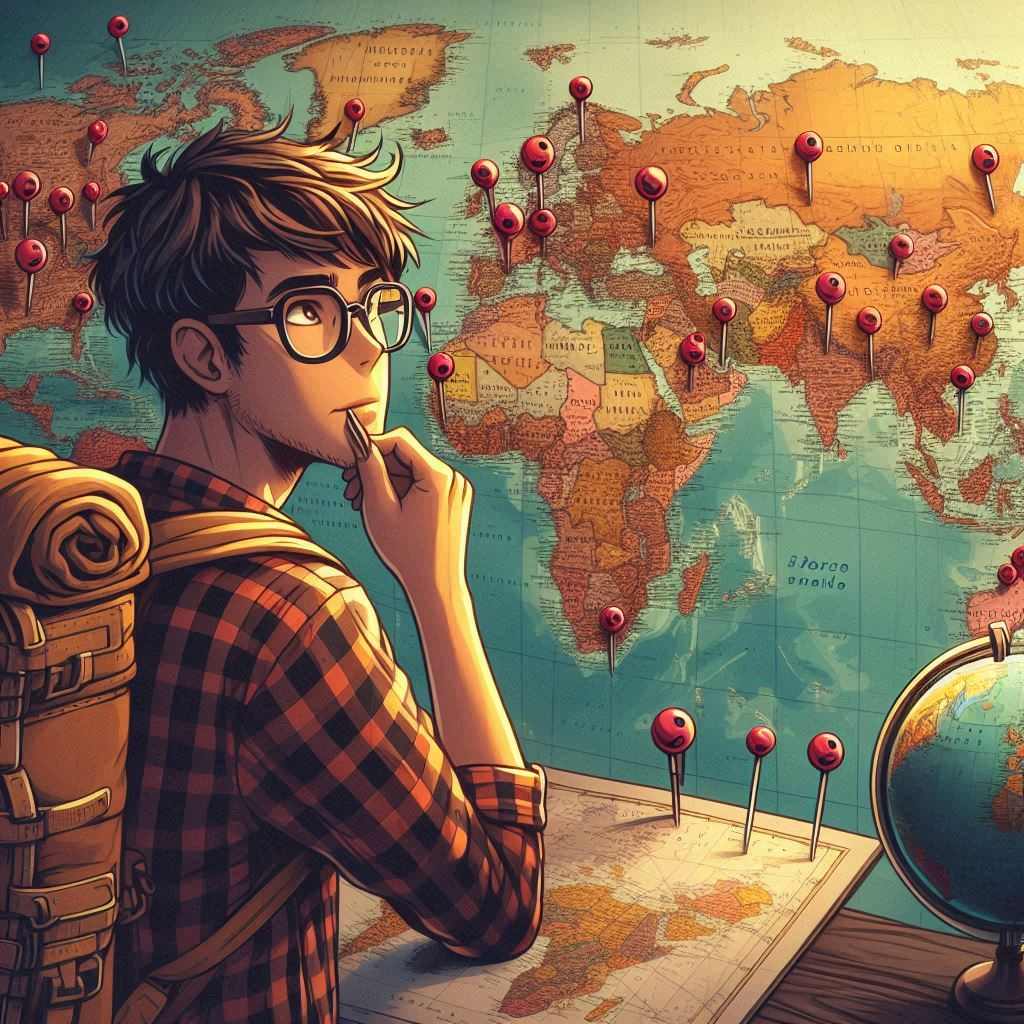

Embora possa parecer simples à primeira vista, o TSP apresenta uma complexidade computacional surpreendente. À medida que o número de cidades aumenta, o número de rotas possíveis cresce exponencialmente, tornando a busca pela solução ótima um desafio, mesmo para os computadores mais poderosos. A seguir, vamos estimar o tempo necessário para calcular a distância entre duas cidades. Essa estimativa nos ajudará a entender a complexidade computacional do Problema do Caixeiro Viajante (TSP) e a prever o tempo que levaríamos para calcular todas as rotas possíveis entre um número n de cidades.

In [1]:
import time
from geopy.distance import geodesic

# Coordenadas das cidades
recife = (-8.05428, -34.8813)
palmares = (-8.67861, -35.5911)

# Número de repetições do cálculo
num_repetitions = 100

# Lista para armazenar os tempos de execução
execution_times = []

for _ in range(num_repetitions):
    # Início da medição de tempo
    start_time = time.time()

    # Calcular a distância em quilômetros
    distance = geodesic(recife, palmares).km

    # Fim da medição de tempo
    end_time = time.time()

    # Calcular o tempo de execução em milissegundos e adicionar à lista
    execution_times.append((end_time - start_time) * 1000)

# Calcular a média dos tempos de execução
average_execution_time = sum(execution_times) / num_repetitions

print(f'A distância entre Recife e Palmares é de {distance:.2f} km.')
print(f'O tempo médio de execução do cálculo foi de {average_execution_time:.2f} milissegundos (média de {num_repetitions} execuções).')

A distância entre Recife e Palmares é de 104.31 km.
O tempo médio de execução do cálculo foi de 0.20 milissegundos (média de 100 execuções).


Para visualizar o impacto do aumento no número de cidades sobre o tempo necessário para resolver o TSP, vamos analisar a relação entre o número de combinações possíveis e o tempo estimado para processá-las. No script a seguir, consideramos um cenário ideal onde um supercomputador, com poder de processamento um milhão de vezes maior que um computador convencional, é utilizado.

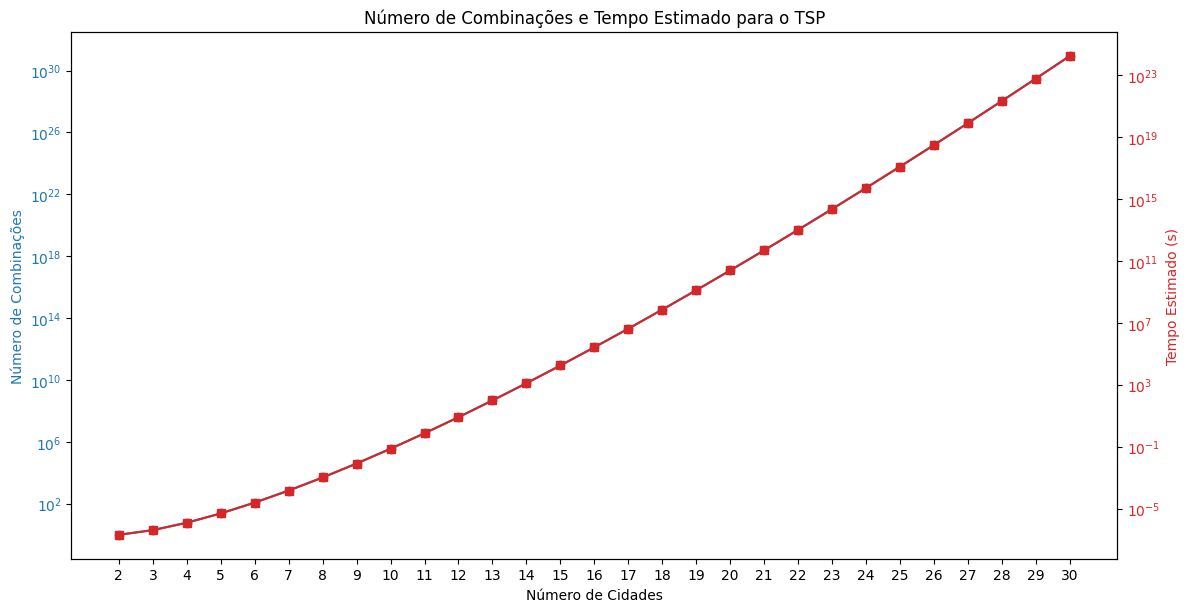

In [2]:
import matplotlib.pyplot as plt
import math

# Definir o número máximo de cidades a serem consideradas
max_cidades = 30
cidades = list(range(2, max_cidades + 1))
combinacoes = [math.factorial(n - 1) for n in cidades]
tempos = [combinacao * average_execution_time/1e6 for combinacao in combinacoes]

# Criar o gráfico com tamanho aumentado
figura, eixo1 = plt.subplots(figsize=(12, 6))  # Aumenta a largura do gráfico

eixo1.set_xlabel('Número de Cidades')
eixo1.set_ylabel('Número de Combinações', color='tab:blue')
eixo1.plot(cidades, combinacoes, 'o-', color='tab:blue')
eixo1.tick_params(axis='y', labelcolor='tab:blue')
eixo1.set_yscale('log')
eixo1.set_xticks(cidades)

eixo2 = eixo1.twinx()
eixo2.set_ylabel('Tempo Estimado (s)', color='tab:red')
eixo2.plot(cidades, tempos, 's-', color='tab:red')
eixo2.tick_params(axis='y', labelcolor='tab:red')
eixo2.set_yscale('log')

figura.tight_layout()
plt.title('Número de Combinações e Tempo Estimado para o TSP')
plt.show()

Para ilustrar a magnitude do tempo necessário para resolver o TSP, vamos comparar o tempo estimado com referências mais familiares:

In [3]:
import numpy as np

def anos_para_segundos(anos):
    segundos_por_ano = 365.25 * 24 * 60 * 60  # Segundos em um ano (considerando anos bissextos)
    return anos * segundos_por_ano

# Dados
expectativa_de_vida = 77  # Expectativa de vida média em anos
idade_do_universo = 13.8e9  # Idade do universo em anos (notação científica)

# Converter idades para segundos
segundos_expectativa_de_vida = anos_para_segundos(expectativa_de_vida)
segundos_idade_do_universo = anos_para_segundos(idade_do_universo)

# Converter a lista de tempos em um array NumPy
tempos_array = np.array(tempos)

# Comparar tempos com as idades convertidas para segundos
flags_expectativa_de_vida = tempos_array > segundos_expectativa_de_vida
flags_idade_do_universo = tempos_array > segundos_idade_do_universo

# Exibir os resultados
print("Tempos maiores que a expectativa de vida", end=': ')
print(np.array(cidades)[flags_expectativa_de_vida])

print("Tempos maiores que a idade do universo em segundos", end=': ')
print(np.array(cidades)[flags_idade_do_universo])

Tempos maiores que a expectativa de vida: [20 21 22 23 24 25 26 27 28 29 30]
Tempos maiores que a idade do universo em segundos: [26 27 28 29 30]


### **Aplicações do TSP em diferentes áreas**

A versatilidade do TSP o torna uma ferramenta valiosa em diversas áreas, impulsionando a otimização e a eficiência em diferentes contextos:

#### **1. Logística e Transporte:**

- **Otimização de Rotas de Entrega:** Empresas de logística utilizam o TSP para determinar as rotas mais eficientes para seus veículos de entrega, minimizando o tempo de viagem e os custos de combustível.
- **Planejamento de Viagens:** Agências de turismo e viajantes independentes podem usar o TSP para planejar roteiros de viagem que minimizem a distância total percorrida, otimizando o tempo e os gastos.
- **Gerenciamento de Frotas:** Empresas com grandes frotas de veículos podem usar o TSP para otimizar o despacho e o roteamento de seus veículos, melhorando a eficiência e reduzindo os custos operacionais.

#### **2. Planejamento de Produção:**

- **Sequenciamento de Tarefas:** Em linhas de produção, o TSP pode ser usado para determinar a ordem ideal de execução das tarefas, minimizando o tempo total de produção e os custos.
- **Alocação de Recursos:** O TSP pode auxiliar na alocação eficiente de recursos (máquinas, ferramentas, etc.) para diferentes tarefas, otimizando o uso dos recursos e aumentando a produtividade.

#### **3. Eletrônica:**

- **Projeto de Placas de Circuito Impresso (PCIs):** O TSP pode ser utilizado para otimizar o posicionamento dos componentes e o roteamento das trilhas nas PCIs, minimizando o comprimento total das trilhas e melhorando o desempenho elétrico.
- **Perfuração de Placas:** Em processos de fabricação que envolvem a perfuração de placas (PCIs, chapas metálicas, etc.), o TSP pode ser usado para determinar a sequência ideal de perfuração, minimizando o tempo total de produção e o desgaste das ferramentas.

#### **4. Outras Aplicações:**

- **Genética:** Sequenciamento de DNA para determinar a ordem dos genes em um cromossomo.
- **Astronomia:** Planejamento de observações astronômicas para minimizar o tempo de movimentação dos telescópios.

## **Algoritmos Genéticos (AGs):**

 Abordagens tradicionais podem se mostrar ineficientes para problemas complexos como o TSP, mas é aí que entram os AGs. Inspirados na evolução natural, esses algoritmos utilizam mecanismos como seleção, cruzamento e mutação para "evoluir" soluções cada vez melhores.

 No caso do TSP, cada rota possível seria um indivíduo em uma população, e a distância total percorrida seria sua aptidão. Ao longo de gerações, as melhores rotas se combinariam e sofreriam mutações, buscando a rota ideal.

### **Inspiração biológica: seleção natural, cruzamento e mutação**

AGs encontram sua inspiração na própria natureza, mais especificamente nos mecanismos da evolução biológica. A seleção natural, o cruzamento e a mutação, processos fundamentais para a adaptação e sobrevivência das espécies, são traduzidos em operações computacionais que impulsionam a busca por soluções otimizadas.

- **Seleção Natural:** Assim como na natureza, onde os indivíduos mais aptos têm maiores chances de sobreviver e se reproduzir, nos AGs, as soluções mais adequadas (aquelas com melhor "fitness") são selecionadas para gerar a próxima geração. Essa seleção direciona a busca para regiões do espaço de soluções com maior potencial de sucesso.

- **Cruzamento (Recombinação):** O cruzamento genético, que na natureza promove a mistura de material genético entre indivíduos, é simulado nos AGs pela combinação de partes de diferentes soluções. Essa recombinação permite a criação de novas soluções que podem herdar características vantajosas de seus "pais", potencialmente superando-os em desempenho.

- **Mutação:** As mutações genéticas, responsáveis pela introdução de variabilidade nas espécies, são representadas nos AGs por pequenas alterações aleatórias nas soluções. Embora a maioria das mutações seja prejudicial, algumas podem levar a melhorias inesperadas, explorando novas áreas do espaço de soluções e evitando que a busca fique presa em ótimos locais.

Esses mecanismos inspirados na biologia, implementada em algoritmos computacionais, permite que os algoritmos genéticos explorem o espaço de soluções de forma eficiente e adaptativa, "evoluindo" em direção a soluções cada vez melhores para problemas complexos.

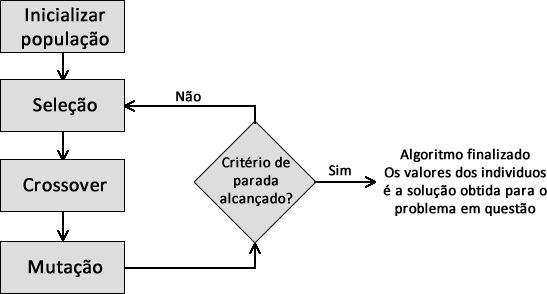

### **Aplicação: encontrando a menor rota entre todas as capitais do brasil com AGs**









O objetivo do nosso AG será encontrar a menor rota possível entre todas as capitais do Brasil. As capitais brasileiras, apresentam um desafio significativo para o algoritmo, pois a combinação de todas as rotas possíveis resulta em um espaço de busca extremamente grande.

In [4]:
STARTING_CITY = 'Recife'

# Dados das capitais (latitude, longitude)
coordinates = {
    "Aracaju": (-10.9111, -37.0717),
    "Belém": (-1.4558, -48.5044),
    "Belo Horizonte": (-19.9167, -43.9345),
    "Boa Vista": (2.8197, -60.6733),
    "Brasília": (-15.7939, -47.8828),
    "Campo Grande": (-20.4428, -54.6461),
    "Cuiabá": (-15.5961, -56.0967),
    "Curitiba": (-25.4297, -49.2647),
    "Florianópolis": (-27.5969, -48.5494),
    "Fortaleza": (-3.7319, -38.5244),
    "Goiânia": (-16.6875, -49.2646),
    "João Pessoa": (-7.115, -34.8631),
    "Macapá": (0.0389, -51.0664),
    "Maceió": (-9.6495, -35.7159),
    "Manaus": (-3.1019, -60.025),
    "Natal": (-5.795, -35.2094),
    "Palmas": (-10.1833, -48.3333),
    "Porto Alegre": (-30.0346, -51.2177),
    "Porto Velho": (-8.7619, -63.9039),
    "Recife": (-8.05428, -34.8813),
    "Rio Branco": (-9.975, -67.8244),
    "Rio de Janeiro": (-22.9068, -43.1729),
    "Salvador": (-12.9777, -38.5016),
    "São Luís": (-2.529, -44.3028),
    "São Paulo": (-23.5505, -46.6333),
    "Teresina": (-5.0892, -42.8015),
    "Vitória": (-20.3194, -40.3399),
}

print(f"O Brasil possui {len(coordinates)} capitais.")

O Brasil possui 27 capitais.


A função geodesic da biblioteca geopy é essencial para calcular as distâncias geográficas entre dois pontos na superfície da Terra. Ela utiliza o formato de coordenadas (latitude e longitude) para determinar a distância sobre a superfície esférica, conhecida como a "distância geodésica".

In [5]:
# Pré-calcular todas as distâncias entre as capitais
distances = {}
cities = list(coordinates.keys())
for i in range(len(cities)):
    for j in range(len(cities)):
        if i != j:
            distances[(cities[i], cities[j])] = geodesic(coordinates[cities[i]], coordinates[cities[j]]).km

### **Implementação de um AG**

Importar o módulo random é essencial para a construção de um AG porque esses algoritmos dependem fortemente de operações estocásticas para simular o processo de evolução natural. Aqui estão algumas justificativas para o uso de random:

- **Inicialização da População:** A geração inicial de soluções (ou cromossomos) precisa ser aleatória para garantir diversidade genética.

- **Seleção:** Elementos são escolhidos aleatoriamente (embora com base em probabilidades) para serem pais da próxima geração.

- **Crossover (Recombinação):** O ponto de corte onde os genes são trocados entre eles é determinado aleatoriamente.

- **Mutação:** A mutação introduz novas variações na população ao alterar aleatoriamente os genes de alguns indivíduos.

Essas operações aleatórias são fundamentais para o funcionamento dos AGs, que são baseados em processos naturais que envolvem muita aleatoriedade. O módulo random fornece as ferramentas necessárias para implementar essas operações de maneira eficiente e eficaz.

In [6]:
import random

### **Parâmetros do AG**

AGs são ferramentas poderosas para otimização, inspiradas na evolução biológica. Seu desempenho e eficácia dependem crucialmente da escolha adequada dos parâmetros. Vamos explorar os parâmetros definidos no seu código e entender como eles influenciam o algoritmo:

#### **POPULATION_SIZE**

In [7]:
POPULATION_SIZE = 10000

- Significado: Define o número de indivíduos (soluções candidatas) em cada geração.
- População grande: Maior diversidade, explora mais o espaço de soluções, mas aumenta o tempo de processamento.
- População pequena: Menor diversidade, converge mais rápido, mas pode ficar presa em ótimos locais.


#### **GENERATIONS**



In [8]:
GENERATIONS = 1000

- Significado: Número máximo de iterações (gerações) do algoritmo.
- Muitas gerações: Mais tempo para encontrar soluções melhores, mas pode ser desnecessário se a convergência ocorrer antes.
- Poucas gerações: Convergência mais rápida, mas pode não encontrar a melhor solução.

#### **ELITISM**

In [9]:
ELITISM = 0.1

- Significado: Proporção dos melhores indivíduos que são diretamente copiados para a próxima geração.
- Elitismo alto: Preserva as melhores soluções, acelera a convergência, mas pode reduzir a diversidade.
- Elitismo baixo: Mantém a diversidade, mas pode levar mais tempo para encontrar soluções ótimas.

#### **MUTATION_RATE**


In [10]:
MUTATION_RATE = 0.1

- Significado: Probabilidade de cada gene de um indivíduo sofrer mutação.
- Taxa alta: Mais exploração, evita mínimos locais, mas pode desestabilizar boas soluções.
- Taxa baixa: Menos exploração, favorece a convergência, mas pode não encontrar a melhor solução.

#### **TOURNAMENT_SIZE**

In [11]:
TOURNAMENT_SIZE = 5

- Significado: Número de indivíduos que competem em cada torneio para seleção.
- Tamanho grande: Mais pressão seletiva, favorece os melhores, mas pode reduzir a diversidade.
- Tamanho pequeno: Menos pressão seletiva, mantém a diversidade, mas pode levar mais tempo para convergir.

#### **MAX_NO_IMPROVEMENT_GENS**

In [12]:
MAX_NO_IMPROVEMENT_GENS = 50

- Significado: Critérios de parada para evitar iterações desnecessárias.
- Threshold baixo: Mais gerações, busca por soluções mais precisas, mas pode aumentar o tempo de execução.
- Threshold alto: Menos gerações, convergência mais rápida, mas pode parar antes de encontrar a melhor solução.

### **População Inicial**

A população inicial é o conjunto de indivíduos que serve como ponto de partida para o processo de otimização. A forma mais simples é gerar indivíduos aleatoriamente dentro do espaço de soluções.

In [13]:
# Função para gerar uma população inicial aleatória
def create_initial_population():
    population = []
    cities.remove(STARTING_CITY)
    for _ in range(POPULATION_SIZE):
        random.shuffle(cities)
        population.append(cities.copy())
    return population

### **Função de Avaliação**

 A função de fitness, também conhecida como função de avaliação ou função objetivo, é o coração do processo evolutivo. Ela desempenha o papel crucial de avaliar a qualidade de cada indivíduo na população, determinando sua aptidão para sobreviver e se reproduzir.

In [14]:
# Função para calcular a distância total de uma rota
def calculate_route_distance(route: list[str]) -> float:
    route = [STARTING_CITY] + route + [STARTING_CITY]
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[(route[i], route[i + 1])]
    return total_distance

# Função de fitness (inverso da distância total)
def fitness(route: list[str]) -> float:
    return 1 / calculate_route_distance(route)

### **Seleção em AGs: o método do torneio**

A seleção determina quais indivíduos da população irão reproduzir-se para criar a próxima geração. Existem vários métodos de seleção, mas um dos mais populares e eficazes é o método do torneio. No método de seleção por torneio, um conjunto de indivíduos é escolhido aleatoriamente da população, e o melhor indivíduo deste conjunto é selecionado para reprodução. Este processo é repetido até que um número suficiente de indivíduos tenha sido selecionado.

In [15]:
# Função de seleção por torneio
def select_parents(population: list[list[str]]) -> list[str]:
    tournament = random.sample(population, TOURNAMENT_SIZE)
    return min(tournament, key=calculate_route_distance)

### **Cruzamento em AGs: a mistura da diversidade**

É o processo de combinar o material genético de dois indivíduos (soluções candidatas) para criar um novo indivíduo (descendente). Essa operação é inspirada na reprodução sexuada da natureza, onde os genes dos pais são misturados para gerar filhos com características únicas. Existem diversos métodos de cruzamento, cada um com suas características e aplicações:

- **Um ponto:** Um ponto de corte é escolhido aleatoriamente, e os segmentos antes e depois do corte são trocados entre os pais.
- **Dois pontos:** Dois pontos de corte são escolhidos, e os segmentos entre os cortes são trocados.
- **Uniforme:** Cada gene do descendente é escolhido aleatoriamente entre os genes dos pais.
- **Especializado:** Métodos específicos para problemas de roteamento, como o Partially Mapped Crossover (PMX) e o Order Crossover (OX).

In [16]:
# Função de cruzamento
def crossover(parent1: list[str], parent2: list[str]) -> list[str]:
    point = random.randint(1, len(parent1) - 2)
    child = parent1[:point]
    for city in parent2:
        if city not in child:
            child.append(city)
    return child

### **Mutação: a fonte da diversidade**

É a introdução de pequenas alterações aleatórias nas soluções. Assim como na natureza, a maioria das mutações é prejudicial, mas algumas raras podem levar a soluções melhores. A mutação explora novas possibilidades e evita que o algoritmo fique preso em soluções ruins.

In [17]:
# Função de mutação (troca)
def mutate(route: list[str]) -> None:
    i, j = random.sample(range(len(route)), 2)
    route[i], route[j] = route[j], route[i]

### **O algoritmo**

Geração 0: Melhor distância = 30837.28 km
Geração 1: Melhor distância = 30564.02 km
Geração 2: Melhor distância = 26173.31 km
Geração 3: Melhor distância = 25917.53 km
Geração 4: Melhor distância = 25478.47 km
Geração 5: Melhor distância = 22959.58 km
Geração 6: Melhor distância = 22959.58 km
Geração 7: Melhor distância = 22110.57 km
Geração 8: Melhor distância = 20835.26 km
Geração 9: Melhor distância = 19251.63 km
Geração 10: Melhor distância = 18985.15 km
Geração 11: Melhor distância = 18985.15 km
Geração 12: Melhor distância = 17296.49 km
Geração 13: Melhor distância = 16967.92 km
Geração 14: Melhor distância = 16472.84 km
Geração 15: Melhor distância = 16472.84 km
Geração 16: Melhor distância = 16472.84 km
Geração 17: Melhor distância = 16086.78 km
Geração 18: Melhor distância = 16062.10 km
Geração 19: Melhor distância = 15821.49 km
Geração 20: Melhor distância = 15417.50 km
Geração 21: Melhor distância = 15186.62 km
Geração 22: Melhor distância = 15075.91 km
Geração 23: Melhor di

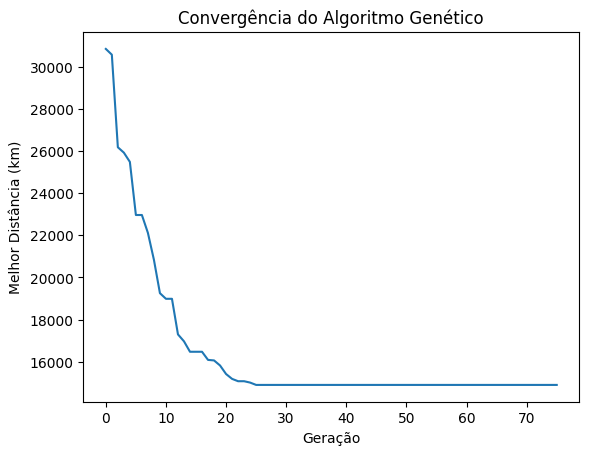

In [18]:
# Algoritmo genético principal
def genetic_algorithm() -> tuple[list[str], float]:
    population = create_initial_population()  # Cria a população inicial
    best_distance = float('inf')  # Define a melhor distância inicial como infinita
    best_distances = []  # Lista para armazenar a melhor distância em cada geração
    generations_no_improvement = 0  # Contador de gerações sem melhorias

    for generation in range(GENERATIONS):  # Itera sobre o número total de gerações
        new_population = []  # Cria uma nova população vazia
        # Elitismo
        elite_size = int(ELITISM * POPULATION_SIZE)  # Calcula o tamanho da elite
        # Adiciona os melhores indivíduos da população atual à nova população
        new_population.extend(sorted(population, key=calculate_route_distance)[:elite_size])

        # Cruzamento e mutação
        while len(new_population) < POPULATION_SIZE:  # Preenche a nova população até atingir o tamanho desejado
            parent1 = select_parents(population)  # Seleciona o pai
            parent2 = select_parents(population)  # Seleciona a mãe
            child = crossover(parent1, parent2)  # Realiza o cruzamento para gerar um filho
            if random.random() < MUTATION_RATE:  # Verifica se ocorre mutação
                mutate(child)  # Aplica mutação ao filho
            new_population.append(child)  # Adiciona o filho à nova população

        population = new_population  # Atualiza a população atual com a nova população

        # Encontrar a melhor rota
        current_best_route = min(population, key=calculate_route_distance)  # Encontra a melhor rota na população atual
        current_best_distance = calculate_route_distance(current_best_route)  # Calcula a distância da melhor rota
        best_distances.append(current_best_distance)  # Armazena a melhor distância na lista

        if current_best_distance < best_distance:  # Verifica se a nova melhor distância é menor que a melhor distância anterior
            best_distance = current_best_distance  # Atualiza a melhor distância
            generations_no_improvement = 0  # Reseta o contador de gerações sem melhorias
        else:
            generations_no_improvement += 1  # Incrementa o contador de gerações sem melhorias

        print(f"Geração {generation}: Melhor distância = {best_distance:.2f} km")  # Imprime a melhor distância da geração atual

        if generations_no_improvement >= MAX_NO_IMPROVEMENT_GENS:  # Verifica se o número máximo de gerações sem melhorias foi atingido
            print(f"Convergência alcançada após {generation} gerações.")  # Imprime uma mensagem de convergência
            break  # Interrompe o loop de gerações

    # Plotar o gráfico de convergência
    plt.plot(best_distances)  # Plota a melhor distância em função das gerações
    plt.title('Convergência do Algoritmo Genético')  # Define o título do gráfico
    plt.xlabel('Geração')  # Define o rótulo do eixo x
    plt.ylabel('Melhor Distância (km)')  # Define o rótulo do eixo y
    plt.show()  # Exibe o gráfico

    return [STARTING_CITY] + current_best_route + [STARTING_CITY], best_distance  # Retorna a melhor rota e a melhor distância

# Executar o algoritmo genético
best_route, best_distance = genetic_algorithm()  # Chama a função do algoritmo genético

### **Resultado: melhor rota**

Após encontrar a rota ótima para o TSP com o AG, é fundamental visualizar a solução em um mapa para melhor compreensão e análise. O código a seguir utiliza a biblioteca folium para criar um mapa interativo que exibe a rota otimizada entre as cidades. Marcadores numerados são colocados em cada cidade, indicando a ordem de visitação, e linhas conectam as cidades na sequência da rota.

In [19]:
import folium

# Cria um mapa centralizado no Brasil
map = folium.Map(location=[-15.7801, -47.9292], zoom_start=4)

# Função auxiliar para adicionar um marcador
def add_marker(city: str, color: str, number: int = None) -> None:
    icon_html = f'<div style="font-size: 12pt; color: white; background-color: {color}; border-radius: 50%; width: 25px; height: 25px; text-align: center; line-height: 25px;">'
    if number is not None:
        icon_html += f'{number}</div>'
    else:
        icon_html += '</div>'

    folium.Marker(
        location=coordinates[city],
        popup=city if number is None else f"{number}: {city}",
        tooltip=city,
        icon=folium.DivIcon(html=icon_html)
    ).add_to(map)

# Adiciona marcadores para cada cidade e plota a rota
for i, city in enumerate(best_route):
    if i == 0 or i == len(best_route) - 1:
        add_marker(city, color='green')  # Cidade de origem e término
    else:
        add_marker(city, color='red', number=i + 1)  # Cidades intermediárias

# Adiciona linhas entre as cidades na rota
for i in range(len(best_route) - 1):
    folium.PolyLine([coordinates[best_route[i]], coordinates[best_route[i + 1]]], color='blue', weight=2.5, opacity=1).add_to(map)

# Salva o mapa em um arquivo HTML
map.save("tsp_route.html")
